In [1]:
import numpy as np
import sys
import math

# Import timer lib. to measure running time
from timeit import default_timer as timer

# Import plot lib. to plot results.
# You may need to install matplotlib by typing "python3 -m pip install -U matplotlib" in the terminal
import matplotlib.pyplot as plt

## **Q1.**

In [2]:
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]

In [3]:
def SelectionSort(A, n):
    for i in range(n - 1):
        smallest = i
      
        for j in range(i + 1, n):
            if A[j] < A[smallest]:
                smallest = j

        (A[i], A[smallest]) = (A[smallest], A[i])

    return A

In [4]:
#Display results of Selection Sort
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
SelectionSort(input_A, len(input_A))
print("Results of Selection Sort:")
print(input_A)

Results of Selection Sort:
[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


# **Q2.**

In [5]:
def BubbleSort(A, n):
    for i in range(n):

        for j in range(0, n - i - 1):

            if A[j] > A[j + 1]:
                temp = A[j]
                A[j] = A[j+1]
                A[j + 1] = temp
                
    return A

In [6]:
# 2.1: Display results of Bubble Sort
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
BubbleSort(input_A, len(input_A))
print("Results of Bubble Sort:")
print(input_A)

Results of Bubble Sort:
[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


In [7]:
# 2.2: Generate random input with the range of S <= input <= F
S = -1000 
F = 1000 
N = 1000 # size of input

random_input = np.random.randint(S, F, N)

#Bubble Sort running time
start = timer()
BubbleSort(random_input, len(random_input))
end = timer()
print("Bubble sort running time:")
print(end-start)

Bubble sort running time:
0.6828749960000025


# **Q3.**

In [8]:
def InsertionSort(A, n):
    for i in range(1, n):        
        key = A[i]
        j = i-1

        while j >=0 and key < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
    return A

In [9]:
# 3.1: Display results of Insertion Sort
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
InsertionSort(input_A, len(input_A))
print("Results of Insertion Sort:")
print(input_A)

Results of Insertion Sort:
[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


In [10]:
# 3.2: Insertion Sort running time
size = [100, 1000, 2000, 3000, 4000, 5000]
random_set, asc_set, dsc_set = [], [], []
for i in range(0, len(size)):
    random_set.append(np.random.randint(0, 1000000, size[i]))
    asc_set.append(np.arange(0, size[i]))
    dsc_set.append(np.arange(size[i], 0, -1))

IS_RS_RT = []
IS_ASC_RT = []
IS_DSC_RT = []

print("\nInsertion Sort times with random_set:")
for array in random_set:
    start = timer()
    InsertionSort(array, len(array))
    end = timer()
    IS_RS_RT.append(end - start)
    print(end-start)

print("\nInsertion Sort times with asc_set:")
for array in asc_set:
    start = timer()
    InsertionSort(array, len(array))
    end = timer()
    IS_ASC_RT.append(end - start)
    print(end-start)

print("\nInsertion Sort times with dsc_set:")
for array in dsc_set:
    start = timer()
    InsertionSort(array, len(array))
    end = timer()
    IS_DSC_RT.append(end - start)
    print(end-start)


Insertion Sort times with random_set:
0.004590075999999499
0.23369247200000132
0.9609358410000013
2.031928578000006
5.557199994000001
9.271856761999999

Insertion Sort times with asc_set:
0.00011018499999693177
0.000851354999994669
0.0017776400000002468
0.002501774999998929
0.003281778999998153
0.004154772999996226

Insertion Sort times with dsc_set:
0.003674818000000357
0.48237499700000086
2.660566291000002
5.646945484
6.168710590000003
5.444677891000012


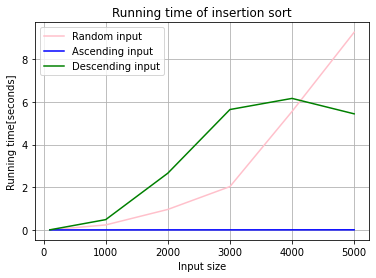

In [11]:
#Plot running times for Insertion Sort
size = [100, 1000, 2000, 3000, 4000, 5000]
plt.plot(size, IS_RS_RT, color= 'pink', label = 'Random input' )
plt.plot(size, IS_ASC_RT, color='blue', label='Ascending input')
plt.plot(size, IS_DSC_RT, color='green', label='Descending input')
plt.title("Running time of insertion sort")
plt.xlabel("Input size")
plt.ylabel("Running time[seconds]")
plt.grid(True)
plt.legend()
plt.show()

Insertion Sort Running Time Analysis:

Best Case running time: If the array is already in ascending order and performs no swaps so it is  O(n) 

Average Case running time: In our case this would be the random_set array. The outer loop runs n times and the inner loop (n+1)/2 times, so the time complexity is  O(n^2) 

Worst Case running time: This is when the array is in descending order which needs n(n-1) swaps so it is  O(n^2)

# **Q4.**

In [12]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    L = [0] * (n1)
    R = [0] * (n2)
 
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    i = 0    
    j = 0   
    k = l     
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
    return arr
 
def mergeSort(arr, l, r):
    if l < r:
        m = l+(r-l)//2
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

    return arr

In [13]:
# 4.1: Display results of Merge Sort
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
mergeSort(input_A, 0, len(input_A) - 1)
print("Results of Merge Sort:")
print(input_A)

Results of Merge Sort:
[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


In [14]:
# 4.2:
size = [1000, 10000, 20000, 30000, 40000, 50000]

random_set, asc_set, dsc_set = [], [], []
for i in range(0, len(size)):
    random_set.append(np.random.randint(0, 1000000, size[i]))
    asc_set.append(np.arange(0, size[i]))
    dsc_set.append(np.arange(size[i], 0, -1))

MS_RS_RT = []
MS_ASC_RT = []
MS_DSC_RT = []

#Running Times for Merge Sort
print("\nMerge Sort times with random_set:")
for array in random_set:
    start = timer()
    mergeSort(array, 0, len(array) - 1)
    end = timer()
    MS_RS_RT.append(end - start)
    print(end-start)

print("\nMerge Sort times with asc_set:")
for array in asc_set:
    start = timer()
    mergeSort(array, 0, len(array) - 1)
    end = timer()
    MS_ASC_RT.append(end - start)
    print(end-start)

print("\nMerge Sort times with dsc_set:")
for array in dsc_set:
    start = timer()
    mergeSort(array, 0, len(array) - 1)
    end = timer()
    MS_DSC_RT.append(end - start)
    print(end-start)


Merge Sort times with random_set:
0.008202444999994896
0.09000521799998751
0.19706992400000445
0.4272428270000006
0.8431014569999888
1.0827556420000093

Merge Sort times with asc_set:
0.012861526000008894
0.16418354800001111
0.34482335999999236
0.3928801760000056
0.38150683199999946
0.4727675110000007

Merge Sort times with dsc_set:
0.007258806999999479
0.07830011800000136
0.18009645400000807
0.27708171800000514
0.3536159060000017
0.4643974629999974


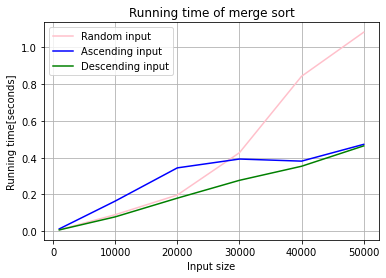

In [15]:
#Plot running times for Merge Sort
size = [1000, 10000, 20000, 30000, 40000, 50000]
plt.plot(size, MS_RS_RT, color= 'pink', label = 'Random input' )
plt.plot(size, MS_ASC_RT, color='blue', label='Ascending input')
plt.plot(size, MS_DSC_RT, color='green', label='Descending input')
plt.title("Running time of merge sort")
plt.xlabel("Input size")
plt.ylabel("Running time[seconds]")
plt.grid(True)
plt.legend()
plt.show()

Merge Sort Running Time Analysis:

All three cases for merge sort (best, worst, and average) have the same time compelxity of O(n * logn) because whatever the input array is, the array will still be divided in half and takes linear time to merge it back into one array. Hence, why the graph of the running time for merge sort for the three different inputs are about the same.